In [95]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from scipy.stats import linregress
import random as random

In [96]:
def ifZero(val):
    if val == 0:
        if random.random() < .5:
            return -1*random.random()
        else:
            return random.random()
    else:
        return val
def sortByPosition(ions):
    ions.sort(key=lambda x:x.position, reverse=False)
    return ions
def getTable(ions):
    #ions = sortByPosition(ions)
    print("Charge\tIon\t\tPosition\t\tVelocity\t\tAcceleration")
    print("_________________________________________________________________________________")
    for x in ions:
        if x.charge == -1 and x.velocity < 0:
            print(x.charge,"\t",x.ion,"\t",x.position,"\t",x.velocity,"\t\t",x.acceleration)
        elif x.charge == -1 and x.velocity >= 0:
            print(x.charge,"\t",x.ion,"\t",x.position,"\t","",x.velocity,"\t\t",x.acceleration)
        elif x.charge == 1 and x.velocity < 0:
            print("",x.charge,"\t",x.ion,"\t",x.position,"\t",x.velocity,"\t\t",x.acceleration)
        elif x.charge == 1 and x.velocity >= 0:
            print("",x.charge,"\t",x.ion,"\t",x.position,"\t","",x.velocity,"\t\t",x.acceleration)
        else:
            print("",x.charge,"\t",x.ion,"\t",x.position,"\t",x.velocity,"\t\t",x.acceleration)
class ion:
    def __init__(self, val, count, pos):
        self.ion =  int(val)
        if count % 2 == 0:
            self.charge = 1
        else:
            self.charge = -1
        self.position = pos
        self.velocity = random.random()*ifZero(random.randrange(-1,1))
        self.acceleration = None
        self.timeLeft = None
        self.timeRight = None
def Acceleration(ions, element, get):
    ions = sortByPosition(ions)
    if element > len(ions):
        return print("Element",element,"does not exist")
    positive_left= 0
    positive_right = 0
    for x in range(len(ions)):
        if x >= element:
            continue
        if ions[x].charge == 1:
            positive_left += 1
    for x in range(len(ions)):
        if x <= element:
            continue
        if ions[x].charge == 1:
            positive_right += 1
    negative_left = element - positive_left
    negative_right = len(ions)-1-element-positive_right
    if (ions[element].charge == 1):
        # acc = positive_right - positive_left - negative_left + negative_right
        negativec = -1*negative_left + negative_right
        positivec = -1*positive_right + positive_left
        acc = (positivec + negativec)
    else:
        negativec = negative_left - negative_right
        positivec = positive_right - positive_left
        acc = (positivec + negativec)
    if get == False:
        ions[element].acceleration = acc
        return ions
    elif get == True:
        return print("Ion:",ions[element].ion,"\nPositive ions on left:",positive_left,"\nNegative ions on left",negative_left,"\nPositive ions on right:",positive_right,"\nNegative ions on right",negative_right)
def calculateAccelerations(ions, sort = True):
    if sort:
        sortByPosition(ions)
    for x in range(len(ions)):
        Acceleration(ions, x, False)
temp_ions = np.linspace(1, 100, 100)
position = []
for x in range(len(temp_ions)):
    position.append(random.random())
ions = []
for x in range(len(temp_ions)):
    ions.append(ion(temp_ions[x], x, position[x]))

In [97]:
ions = sortByPosition(ions)
getTable(ions)

Charge	Ion		Position		Velocity		Acceleration
_________________________________________________________________________________
-1 	 52 	 0.007219381205640696 	  0.45457339270739283 		 None
-1 	 62 	 0.04205838660644434 	 -0.1798984059503672 		 None
 1 	 99 	 0.04388785225754821 	  0.3066242747874689 		 None
-1 	 92 	 0.07822418766213013 	 -0.7837784678110045 		 None
 1 	 81 	 0.09847516538664103 	  0.005396000454063315 		 None
-1 	 96 	 0.10154724823911554 	 -0.9248989459264547 		 None
-1 	 34 	 0.11681430474454091 	 -0.07313320979648841 		 None
 1 	 27 	 0.1294354556646451 	  0.5527573404642745 		 None
 1 	 31 	 0.13633102357355154 	 -0.2751086038040592 		 None
 1 	 37 	 0.16917291971084492 	 -0.4105139168957108 		 None
 1 	 71 	 0.18246983641232783 	 -0.45825350110802976 		 None
-1 	 56 	 0.2065454784290166 	 -0.664949150236596 		 None
 1 	 43 	 0.2189369850973466 	 -0.09928471290838059 		 None
 1 	 91 	 0.22329688416189075 	 -0.1788739025008491 		 None
 1 	 55 	 0.2367327258297497 	

In [98]:
Acceleration(ions, 3, True)
#this prints the information for acceleration for the ion that is in the 3rd smallest position

Ion: 92 
Positive ions on left: 1 
Negative ions on left 2 
Positive ions on right: 49 
Negative ions on right 47


In [99]:
#setting accelerations based on how many to the left and right
for x in range(len(ions)):
    ions = sortByPosition(ions)
    Acceleration(ions, x, False)
getTable(ions)
# i think the math for calculating acceleration is wrong. This is what I currently need help with

Charge	Ion		Position		Velocity		Acceleration
_________________________________________________________________________________
-1 	 52 	 0.007219381205640696 	  0.45457339270739283 		 1
-1 	 62 	 0.04205838660644434 	 -0.1798984059503672 		 3
 1 	 99 	 0.04388785225754821 	  0.3066242747874689 		 -3
-1 	 92 	 0.07822418766213013 	 -0.7837784678110045 		 3
 1 	 81 	 0.09847516538664103 	  0.005396000454063315 		 -3
-1 	 96 	 0.10154724823911554 	 -0.9248989459264547 		 3
-1 	 34 	 0.11681430474454091 	 -0.07313320979648841 		 5
 1 	 27 	 0.1294354556646451 	  0.5527573404642745 		 -5
 1 	 31 	 0.13633102357355154 	 -0.2751086038040592 		 -3
 1 	 37 	 0.16917291971084492 	 -0.4105139168957108 		 -1
 1 	 71 	 0.18246983641232783 	 -0.45825350110802976 		 1
-1 	 56 	 0.2065454784290166 	 -0.664949150236596 		 -1
 1 	 43 	 0.2189369850973466 	 -0.09928471290838059 		 1
 1 	 91 	 0.22329688416189075 	 -0.1788739025008491 		 3
 1 	 55 	 0.2367327258297497 	 -0.08130272255191096 		 5
 1 	 11 	

In [100]:
def solveQuadraticGreaterThanZero(a, b, c,): #quadratic formula
    if a == 0:
        if -c / b > 0:
            return -c / b
        return None
    d = b * b - 4 * a * c
    if d < 0:
        return None
    x1 = (-b + np.sqrt(d)) / (2 * a)
    x2 = (-b - np.sqrt(d)) / (2 * a)
    if x1 > 0:
        if x2 > 0:
            return min(x1, x2)
        else:
            return x1
    elif x2 > 0:
        return x2
    return None
def calculateCollisionTime(ions, debug = False):
    ions = sortByPosition(ions)

    # "collision events"
    events = []

    # first/last ion with wall:
    # wallPos = a/2 * t^2 + v * t + pos
    leftWallTime = solveQuadraticGreaterThanZero(ions[0].acceleration / 2, ions[0].velocity, ions[0].position)
    events.append([leftWallTime, 0, 'wall'])
    rightWallTime = solveQuadraticGreaterThanZero(ions[-1].acceleration / 2, ions[-1].velocity, ions[-1].position - 1)
    events.append([rightWallTime, -1, 'wall'])

    for i in range(1, len(ions)):
        # adjacent ion pairs:
        # a1/2 * t^2 + v1 * t + pos1 = a2/2 * t^2 + v2 * t + pos2
        pairTime = solveQuadraticGreaterThanZero(
            ions[i].acceleration / 2 - ions[i - 1].acceleration / 2,
            ions[i].velocity - ions[i - 1].velocity,
            ions[i].position - ions[i - 1].position
        )
        events.append([pairTime, i, i - 1])
    # exclude events that will not happen
    events = [e for e in events if e[0] is not None]
    #for x in events:
      # print(x, sep='') 
    if len(events) == 0:
        return [None, None, None]

    # find the first event
    return min(events, key = lambda e: e[0])
calculateCollisionTime(ions)

[0.0007989114835083577, 97, 96]

In [101]:
def evolve(ions, time, element):
    #new position = s + v*t + (a*t^2/2)
    s = ions[element].position + ions[element].velocity*time + (ions[element].acceleration*time**2)/2
    #changed by vwb
    v = ions[element].velocity + ions[element].acceleration*time
    #Comment by vwb
    #there is something messed up about this.  If an ion hit's the wall, it should trigger a 'wall' least time event, 
    #and it should never really go past 0 or 1, it should just reverse velocity
    if s <= 0:
        s *= -1
        v *= -1
    elif s >= 1:
        #modified by vwb
        s = 2-s
        v *= -1
    ions[element].position = s
    #new velocity = v + a*t
    ions[element].velocity = v
    #Acceleration(ions, element, False)

In [102]:
def evolveAmount(ions, amount):
    pos = []
    vels = []
    times = []
    for y in range(amount):
        leastTime = calculateCollisionTime(ions)
        for x in range(len(ions)):
            evolve(ions, leastTime[0], x)
            pos.append(ions[x].position)
            vels.append(ions[x].velocity)
    pos.sort()
    vels.sort()
    calculateAccelerations(ions, False)
    return [pos, vels]
#evo = evolveAmount(ions, 100)
#plt.plot(evo[1], evo[0])
#plt.show()
#print (min(evo[0]))

In [103]:
def evolveAmountTable(ions, amount):
    initial_pos = []
    final_pos = []
    times = []
    for y in range(amount):
        message = ''
        leastTime = calculateCollisionTime(ions)
        times.append(leastTime)
        for x in range(len(ions)):
            evolve(ions, leastTime[0], x)
        message += "Table for evolution number "+str(y+1)
        if leastTime[2] is 'wall':
            message += '\nThis was a wall collision, therefore no ions switched positions'
        else:
            ions[leastTime[1]], ions[leastTime[2]] = ions[leastTime[2]], ions[leastTime[1]]
            message += "\nThis was evoled for "+str(leastTime[0])+" seconds\nIon "+str(ions[leastTime[1]].ion)+" collided with ion "+str(ions[leastTime[2]].ion)
        calculateAccelerations(ions, False)
        print(message)
        getTable(ions)
        print('\n\n')
#evolveAmountTable(ions, 20)

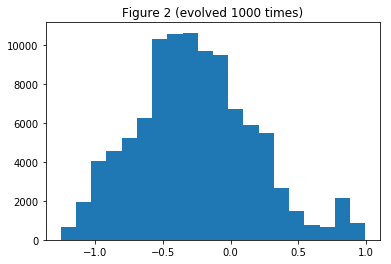

In [104]:
times = []
energies = []
P_pos = []
P_neg = []
def getHistogram(ions, amount, figure):
    vels = []
    ion_positions = []
    for y in range(amount):
        leastTime = calculateCollisionTime(ions)
        if y is not 0:
            times.append(leastTime[0]+ times[y-1])
        else:
            times.append(leastTime[0])
        energy = 0
        for x in range(len(ions)):
            evolve(ions, leastTime[0], x)
            #Accerleration(ions, x, False)
            ion_positions.append(ions[x].position)
            vels.append(ions[x].velocity)
            energy += (ions[x].velocity**2) * 0.5
            if x is 0:
                continue;
            elif ions[x].charge is 1 and ions[x-1].charge is 1:
                P_pos.append((ions[x].position - ions[x-1].position))
            elif ions[x].charge is -1 and ions[x-1].charge is -1:
                P_pos.append((ions[x].position - ions[x-1].position))
            else:
                P_neg.append((ions[x].position - ions[x-1].position))
        energies.append(energy)
        #calculateAccelerations(ions, False)
        for x in range(len(ions)):
            Acceleration(ions, x, False)
    if figure is 'positions':
        plt.hist(ion_positions, bins=20)
    else:
        plt.hist(vels, bins=20)
    plt.title('Figure 2 (evolved '+str(amount)+' times)')
    plt.show()
    #print(*vels, sep = '\n')
getHistogram(ions, 1000, 'vels')

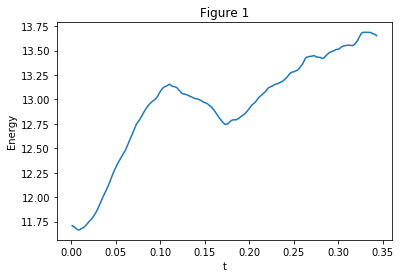

In [105]:
plt.plot(times, energies)
plt.xlabel('t')
plt.ylabel('Energy')
plt.title('Figure 1')
plt.show()

In [106]:
P_pos = []
P_neg = []
probability_neg = []
probability_pos = []
for x in range(len(ions)):
    for y in range(len(ions)):
        if x is y:
            continue;
        if ions[x].charge is ions[y].charge:
            P_pos.append(np.abs(ions[x].position - ions[y].position))
        elif ions[x].charge is not ions[y].charge:
            P_neg.append(np.abs(ions[x].position - ions[y].position))
P_neg.sort()
P_pos.sort()
for y in range(len(P_pos)):
    probability_pos.append(P_pos[y]/(P_pos[y]+P_neg[y]))
    probability_neg.append(P_neg[y]/(P_pos[y]+P_neg[y]))
slicer = slice(0, 4900)
slicer2 = slice(50, 4900)
P_neg = P_neg[slicer]
P_neg = P_neg[slicer2]
P_pos = P_pos[slicer2]
probability_neg = probability_neg[slicer2]
probability_pos = probability_pos[slicer2]

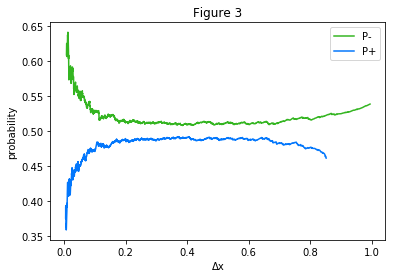

In [107]:
plt.plot(P_pos, probability_pos, label='P-', color='#34b521')
plt.plot(P_neg, probability_neg, label='P+', color='#0377fc')
plt.title('Figure 3')
plt.xlabel('Δx')
plt.ylabel('probability')
plt.legend(loc="upper right")
plt.show()

In [108]:
log_prob = np.log(probability_neg)
print(np.polyfit(P_neg, log_prob, 1))

[ 0.10497331 -0.77020779]


In [109]:
getTable(ions)

Charge	Ion		Position		Velocity		Acceleration
_________________________________________________________________________________
 1 	 37 	 0.0005999959893466574 	 -0.4248644047864144 		 1
 1 	 93 	 0.012250238016958341 	 -0.8197341201519688 		 3
-1 	 44 	 0.02151549006584847 	  0.8092595450011331 		 -3
 1 	 71 	 0.030215353714852507 	 -0.3238180840411145 		 3
-1 	 96 	 0.030269136701439475 	  0.3647695146874849 		 -3
 1 	 99 	 0.03852682727602697 	  0.2793762397793814 		 3
-1 	 56 	 0.0428825509465521 	  0.8627071004339633 		 -3
-1 	 78 	 0.04416339585535072 	 -0.7426669027353896 		 -1
 1 	 43 	 0.07175794728304546 	 -0.6900675441532582 		 1
 1 	 31 	 0.07494578626320758 	  0.7120946921454747 		 3
-1 	 92 	 0.07564492013447996 	  0.09597243578541846 		 -3
-1 	 62 	 0.09014481225706363 	  0.05509946175360274 		 -1
 1 	 81 	 0.1078747154797355 	  0.9933184755864108 		 1
-1 	 94 	 0.11409556673352897 	 -0.2153209143130464 		 -1
-1 	 98 	 0.12106199931267454 	 -0.9745442348272177 		 1
-1 	 2

In [26]:
positive_less = 0
negative_less = 0
negative_more = 0
positive_more = 0
for x in range(len(ions)):
    if x < 50 and ions[x].charge is 1:
        positive_less+=1
    elif x < 50 and ions[x].charge is -1:
        negative_less+=1
    elif x >= 50 and ions[x].charge is 1:
        positive_more+=1
    else:
        negative_more+=1
print(positive_less, negative_less, positive_more, negative_more)
Acceleration(ions, 49, True)
print("END CODING")
print("_______________________________________________________________________________________________________")

22 28 28 22
Ion: 45 
Positive ions on left: 21 
Negative ions on left 28 
Positive ions on right: 28 
Negative ions on right 22
END CODING
_______________________________________________________________________________________________________


# Post lab writeup
What does figure 1 mean?
- Figure 1 shows kinetic energy vs time of the system. When t is small, kinetic energy oscillates rapidly. This is because equilibrium is far from being reached; opposite charged particles are next to each other at the beginning and before movement they hold just potential energy. As the system evolves, the potential energy is converted to kinetic as particles are pushed away from each other. The velocity increases, giving a local maximum in kinetic energy, and then as the distance increases from the original opposing particle, the distance to others is smaller. The charge from these other particles slows down incoming, high velocity particles, and as the opposing charge slows down the particle, kinetic energy drops again and potential energy is high.

What does figure 2 mean?
- Figure 2 tells us that the distribution of velocity follows a Maxwell distribution. This is important because it shows that our code was correct in respect to calculating velocities due to applied force. It proves that over a range from -1 to 1, most particles have a velocity towards the center, and very few have the max velocities. An equal amount of particles have opposite charge, forcing particles to bounce back and forth between oppositely charged particles. If you take the average of these oscillations, they will be near zero, which is why the graph shows a maximum number of particles around v = 0.

What does figure 3 mean?
- Figure 3 represents the probability that particles of either opposite or same charge will be a certain distance from each other. This is important to the study because it is a different way of telling us that opposite charges repel each other. If you look at the particles that are directly next to each other, 60% of them are opposite charges and 40% are the same. The graph also shows that the probability reaches 50% at a distance of around .15. This could either mean that opposing charges are no longer forceful at a distance of .15, or that in our system, when opposing particles are that far apart, other particles present are close enough to apply a force that cancels out the original repelling force.

## Plasma Simulation Lab by Sam Olson and Jess Bosch

*Note: The following code is for 1000 ions and then 10 ions*

In [121]:
temp_ions = np.linspace(1, 1000, 1000)
new_position = []
for x in range(len(temp_ions)):
    new_position.append(random.random())
new_ions = []
for x in range(len(temp_ions)):
    new_ions.append(ion(temp_ions[x], x, new_position[x]))
for x in range(len(new_ions)):
    new_ions = sortByPosition(new_ions)
    Acceleration(new_ions, x, False)
getTable(new_ions)

Charge	Ion		Position		Velocity		Acceleration
_________________________________________________________________________________
-1 	 300 	 0.00028334917620542743 	  0.07026048861842103 		 1
-1 	 518 	 0.0006571468299233496 	  0.1328977414762389 		 3
 1 	 529 	 0.005483703418128538 	 -0.7303336419588241 		 -3
 1 	 941 	 0.0064825945081863345 	  0.011379924098183681 		 -1
 1 	 873 	 0.007826762137974841 	  0.18938704542312523 		 1
 1 	 77 	 0.008094072414261744 	 -0.8364057215161854 		 3
 1 	 119 	 0.00942677866999575 	 -0.05139377295463443 		 5
 1 	 725 	 0.011357723578986123 	  0.6072465144293504 		 7
-1 	 708 	 0.013072715959971726 	 -0.19464911552059416 		 -7
-1 	 90 	 0.013486738230717332 	 -0.4618905355546806 		 -5
 1 	 455 	 0.016113175003053648 	 -0.30947528123877455 		 5
-1 	 642 	 0.017877914774060977 	 -0.3339181144040967 		 -5
 1 	 35 	 0.018116828925143547 	  0.2159718129984948 		 5
-1 	 550 	 0.021297903087144188 	 -0.5036102273534868 		 -5
 1 	 9 	 0.021792529284502038 	  0

 1 	 213 	 0.1955314368146418 	 -0.05873678012617548 		 -41
 1 	 909 	 0.1963320039198697 	 -0.32274970630079536 		 -39
 1 	 707 	 0.1981851815947443 	 -0.32726662656647554 		 -37
-1 	 350 	 0.1982136491342048 	 -0.946424791343706 		 37
 1 	 927 	 0.19824484755588634 	 -0.19311339195488636 		 -37
-1 	 242 	 0.19938142122189506 	 -0.1981216024866035 		 37
 1 	 245 	 0.19960826705659285 	 -0.3910684935192422 		 -37
 1 	 607 	 0.20007940082674058 	  0.05861715103554705 		 -35
 1 	 481 	 0.2002349678133204 	 -0.4386851896806514 		 -33
-1 	 940 	 0.20063355844224984 	  0.6056715088558784 		 33
 1 	 389 	 0.20086972393978397 	 -0.6654690723974112 		 -33
 1 	 209 	 0.2017133161574549 	 -0.5895606300360119 		 -31
-1 	 140 	 0.20256653859474016 	 -0.38563749870052977 		 31
 1 	 649 	 0.20311694462895247 	 -0.5329583241585728 		 -31
 1 	 961 	 0.20497530755110271 	  0.03594482498696763 		 -29
-1 	 740 	 0.20551818133043098 	 -0.5532010391592829 		 29
 1 	 299 	 0.20570722033821054 	  0.049640279

 1 	 323 	 0.34472584703283615 	 -0.07129710880110916 		 -33
 1 	 147 	 0.34494688497449133 	  0.3383080618459384 		 -31
 1 	 351 	 0.345727017599452 	 -0.5897430902435218 		 -29
-1 	 86 	 0.34656855371066675 	 -0.24579548978823387 		 29
 1 	 3 	 0.34746741246752644 	 -0.2761591956745496 		 -29
 1 	 485 	 0.3476828914783071 	 -0.8334813356849015 		 -27
-1 	 656 	 0.34814339778581904 	 -0.06768385830267237 		 27
-1 	 294 	 0.349454622499518 	 -0.0804865675785202 		 29
-1 	 600 	 0.3512495460707724 	 -0.4209769539925723 		 31
 1 	 693 	 0.3527174866766556 	 -0.25866542007948945 		 -31
 1 	 337 	 0.35747336425093745 	 -0.3325257426840308 		 -29
-1 	 178 	 0.35926982779122074 	 -0.4510528541018607 		 29
 1 	 625 	 0.35975918895358094 	 -0.5027493790334857 		 -29
 1 	 943 	 0.36034577642291765 	 -0.5594213442249037 		 -27
-1 	 742 	 0.36118820191966317 	 -0.21669601270566288 		 27
-1 	 958 	 0.36247506456348744 	 -0.10791221308967894 		 29
 1 	 401 	 0.36255245844312656 	 -0.299757821779877

 1 	 31 	 0.49893556940176675 	  0.016056246997182368 		 -69
-1 	 360 	 0.49900157160040004 	  0.07854310675032446 		 69
-1 	 208 	 0.49910560109908797 	  0.030911151061689367 		 71
-1 	 166 	 0.5014850764286672 	 -0.23637698780982772 		 73
-1 	 838 	 0.5018683897564119 	 -0.1619316397853532 		 75
-1 	 538 	 0.5030917658615739 	 -0.540267005334198 		 77
-1 	 976 	 0.5032988256885562 	 -0.08469125684700585 		 79
-1 	 738 	 0.5038024163782275 	 -0.6905653345997932 		 81
-1 	 374 	 0.5039036660668607 	  0.1275222419491196 		 83
-1 	 330 	 0.5039211820519796 	 -0.6865794303335824 		 85
 1 	 153 	 0.5041246687510299 	 -0.14835844073901275 		 -85
 1 	 969 	 0.5071476254404659 	 -0.03936672166989864 		 -83
 1 	 261 	 0.5082294021539929 	 -0.2866877513129249 		 -81
 1 	 181 	 0.509259441827174 	 -0.011515924242278257 		 -79
-1 	 406 	 0.5101172784923752 	 -0.4152100484317838 		 79
 1 	 661 	 0.5103150701523137 	 -0.6539850011653608 		 -79
-1 	 824 	 0.5128675619978267 	  0.04940732397454084 		

-1 	 314 	 0.6518365848402933 	  0.28266831150728233 		 71
 1 	 535 	 0.6524247371627124 	  0.016499458927165905 		 -71
 1 	 863 	 0.6525217145254286 	  0.2836740481654359 		 -69
 1 	 917 	 0.6528577561794304 	  0.12126331359820748 		 -67
-1 	 16 	 0.6532711459702754 	  0.00028398003687526307 		 67
 1 	 491 	 0.6539583670553395 	 -0.2661199556493091 		 -67
-1 	 238 	 0.654538500195092 	 -0.18796894309363366 		 67
-1 	 32 	 0.6548506838698853 	  0.46308298463092495 		 69
-1 	 4 	 0.6553743393278733 	 -0.6375591173125542 		 71
-1 	 920 	 0.6556473195389727 	  0.17256375773125432 		 73
 1 	 267 	 0.6559807935961322 	 -0.1432969472348254 		 -73
 1 	 721 	 0.6570539526905171 	 -0.034461538510056594 		 -71
-1 	 346 	 0.6584192473061363 	 -0.5955062409516537 		 71
 1 	 293 	 0.6584853145754681 	 -0.3453019014587785 		 -71
 1 	 641 	 0.6587591765825127 	  0.3622817694058534 		 -69
 1 	 279 	 0.6597673995545713 	  0.44273573727991267 		 -67
 1 	 555 	 0.6609704947779524 	 -0.5599194178378792 		

 1 	 799 	 0.8199003568513323 	  0.12308213706003683 		 -39
 1 	 599 	 0.8206810218977605 	 -0.07045414549039565 		 -37
 1 	 395 	 0.8208286203787648 	  0.16209950224922867 		 -35
 1 	 697 	 0.8213811335128188 	  0.7324070610777742 		 -33
-1 	 28 	 0.8217114818998106 	 -0.19178608949131049 		 33
 1 	 297 	 0.821991375880068 	 -0.9849004441487658 		 -33
 1 	 257 	 0.8235691661238805 	 -0.008906596136134027 		 -31
 1 	 313 	 0.8246127304313527 	 -0.524304119270365 		 -29
-1 	 592 	 0.8291789316429702 	 -0.15073078638788007 		 29
 1 	 169 	 0.8308202398201958 	  0.14608829311431942 		 -29
-1 	 234 	 0.8321595478396273 	  0.0016082023699612673 		 29
 1 	 973 	 0.8351395900097426 	 -0.6096780880370791 		 -29
-1 	 22 	 0.8352526623339454 	 -0.1290245961648202 		 29
-1 	 782 	 0.8354691780810735 	  0.012178451066975295 		 31
 1 	 309 	 0.8354783680490652 	 -0.3064581810679972 		 -31
-1 	 118 	 0.835629825365143 	 -0.07255786582476409 		 31
 1 	 675 	 0.8378305117607091 	  0.29720325180893115 

 1 	 461 	 0.9507359308511307 	  0.652036886536195 		 5
 1 	 813 	 0.951881728830822 	 -0.43776470543638324 		 7
-1 	 392 	 0.9528975322577212 	 -0.28478151110812505 		 -7
-1 	 704 	 0.953115963891651 	 -0.11054549965337723 		 -5
 1 	 243 	 0.9554911421016471 	 -0.9477105274321329 		 5
-1 	 220 	 0.9556875221911919 	  0.1157013930662879 		 -5
 1 	 637 	 0.9557948837503873 	  0.5598892236336049 		 5
-1 	 500 	 0.9574520225450622 	 -0.2158097606873916 		 -5
-1 	 528 	 0.9577438558514598 	 -0.9720142029066803 		 -3
 1 	 655 	 0.9588922384722662 	 -0.866776987871885 		 3
 1 	 71 	 0.9591528968555095 	 -0.9762492910148588 		 5
-1 	 626 	 0.9596095108811603 	 -0.3774269460026694 		 -5
 1 	 195 	 0.9597757878303982 	 -0.5710500944384495 		 5
 1 	 379 	 0.9612686906715355 	 -0.8643034986267577 		 7
 1 	 635 	 0.9621416697142826 	  0.31645720674995953 		 9
 1 	 355 	 0.9633410477228069 	 -0.002415017231410854 		 11
-1 	 840 	 0.9637017297294632 	 -0.9076727507997607 		 -11
 1 	 679 	 0.96571040

In [122]:
new_times = []
new_energies = []
new_P_pos = []
new_P_neg = []
new_probability_neg = []
new_probability_pos = []
def getHistogram(new_ions, amount, figure):
    vels = []
    ion_positions = []
    for y in range(amount):
        leastTime = calculateCollisionTime(new_ions)
        if y is not 0:
            new_times.append(leastTime[0]+ new_times[y-1])
        else:
            new_times.append(leastTime[0])
        energy = 0
        for x in range(len(new_ions)):
            evolve(new_ions, leastTime[0], x)
            #Accerleration(ions, x, False)
            ion_positions.append(new_ions[x].position)
            vels.append(new_ions[x].velocity)
            energy += (new_ions[x].velocity**2) * 0.5
            if x is 0:
                continue;
            elif new_ions[x].charge is 1 and new_ions[x-1].charge is 1:
                new_P_pos.append((new_ions[x].position - new_ions[x-1].position))
            elif new_ions[x].charge is -1 and new_ions[x-1].charge is -1:
                new_P_pos.append((new_ions[x].position - new_ions[x-1].position))
            else:
                new_P_neg.append((new_ions[x].position - new_ions[x-1].position))
        new_energies.append(energy)
        #calculateAccelerations(ions, False)
        for x in range(len(new_ions)):
            Acceleration(new_ions, x, False)
   # if figure is 'positions':
      #  plt.hist(ion_positions, bins=20)
    #else:
        #plt.hist(vels, bins=20)
    #plt.title('Figure 2 (evolved '+str(amount)+' times)')
    #plt.show()
getHistogram(new_ions, 100, 'vels')

In [123]:
for x in range(len(new_ions)):
    for y in range(len(new_ions)):
        if x is y:
            continue;
        if new_ions[x].charge is new_ions[y].charge:
            new_P_pos.append(np.abs(new_ions[x].position - new_ions[y].position))
        elif new_ions[x].charge is not new_ions[y].charge:
            new_P_neg.append(np.abs(new_ions[x].position - new_ions[y].position))
new_P_neg.sort()
new_P_pos.sort()
for y in range(len(new_P_neg)):
    new_probability_pos.append(new_P_pos[y]/(new_P_pos[y]+new_P_neg[y]))
    new_probability_neg.append(new_P_neg[y]/(new_P_pos[y]+new_P_neg[y]))
slicer2 = slice(50, 150000)
new_P_neg = new_P_neg[slicer2]
new_P_pos = new_P_pos[slicer2]
new_probability_neg = new_probability_neg[slicer2]
new_probability_pos = new_probability_pos[slicer2]
plt.plot(new_P_pos, new_probability_pos, label='P+', color='#34b521')
plt.plot(new_P_neg, new_probability_neg, label='P-', color='#0377fc')
plt.title('Figure 3')
plt.xlabel('Δx')
plt.ylabel('probability')
plt.legend(loc="upper right")
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


IndexError: list index out of range

In [ ]:
#print(*new_P_neg, sep = '\n')
#print(*new_probability_neg, sep = '\n')
#print(new_P_neg, new_probability_neg)

In [ ]:
temp_ions = np.linspace(1, 10, 10)
new_position = []
for x in range(len(temp_ions)):
    new_position.append(random.random())
new_ions = []
for x in range(len(temp_ions)):
    new_ions.append(ion(temp_ions[x], x, new_position[x]))
for x in range(len(new_ions)):
    new_ions = sortByPosition(new_ions)
    Acceleration(new_ions, x, False)
getTable(new_ions)

In [ ]:
new_times = []
new_energies = []
new_P_pos = []
new_P_neg = []
new_probability_neg = []
new_probability_pos = []
def getHistogram(new_ions, amount, figure):
    vels = []
    ion_positions = []
    for y in range(amount):
        leastTime = calculateCollisionTime(new_ions)
        if y is not 0:
            new_times.append(leastTime[0]+ new_times[y-1])
        else:
            new_times.append(leastTime[0])
        energy = 0
        for x in range(len(new_ions)):
            evolve(new_ions, leastTime[0], x)
            #Accerleration(ions, x, False)
            ion_positions.append(new_ions[x].position)
            vels.append(new_ions[x].velocity)
            energy += (new_ions[x].velocity**2) * 0.5
            if x is 0:
                continue;
            elif new_ions[x].charge is 1 and new_ions[x-1].charge is 1:
                new_P_pos.append((new_ions[x].position - new_ions[x-1].position))
            elif new_ions[x].charge is -1 and new_ions[x-1].charge is -1:
                new_P_pos.append((new_ions[x].position - new_ions[x-1].position))
            else:
                new_P_neg.append((new_ions[x].position - new_ions[x-1].position))
        new_energies.append(energy)
        #calculateAccelerations(ions, False)
        for x in range(len(new_ions)):
            Acceleration(new_ions, x, False)
    #if figure is 'positions':
     #   plt.hist(ion_positions, bins=20)
    #else:
        #plt.hist(vels, bins=20)
    #plt.title('Figure 2 (evolved '+str(amount)+' times)')
    #plt.show()
getHistogram(new_ions, 1000, 'vels')

In [ ]:
for x in range(len(new_ions)):
    for y in range(len(new_ions)):
        if x is y:
            continue;
        if new_ions[x].charge is new_ions[y].charge:
            new_P_pos.append(np.abs(new_ions[x].position - new_ions[y].position))
        elif new_ions[x].charge is not new_ions[y].charge:
            new_P_neg.append(np.abs(new_ions[x].position - new_ions[y].position))
new_P_neg.sort()
new_P_pos.sort()
for y in range(len(new_P_pos)):
    new_probability_pos.append(new_P_pos[y]/(new_P_pos[y]+new_P_neg[y]))
    new_probability_neg.append(new_P_neg[y]/(new_P_pos[y]+new_P_neg[y]))
slicer2 = slice(500, 3000)
new_P_neg = new_P_neg[slicer2]
new_P_pos = new_P_pos[slicer2]
new_probability_neg = new_probability_neg[slicer2]
new_probability_pos = new_probability_pos[slicer2]

In [ ]:
plt.plot(new_P_pos, new_probability_pos, label='P+', color='#34b521')
plt.plot(new_P_neg, new_probability_neg, label='P-', color='#0377fc')
plt.title('Figure 3')
plt.xlabel('Δx')
plt.ylabel('probability')
plt.legend(loc="upper right")
plt.show()

In [ ]:
log_new_prob = np.log(new_probability_pos)
vals = np.polyfit(new_P_neg, log_new_prob, 1)
old_y = []
for i in range(len(new_P_pos)):
    old_y.append(vals[0] * new_P_pos[i])
y = np.exp(vals[1]) * np.exp(old_y)
plt.plot(new_P_pos, y, label = 'P+')
plt.legend(loc="upper right")
plt.show()
print(np.polyfit(new_P_neg, log_new_prob, 1))

In [ ]:
log_new_prob = []
vals = []
for i in range(len(new_probability_neg)):
    if new_probability_neg[i] is not 0:
        log_new_prob.append(np.log(new_probability_neg[i]))
vals = np.polyfit(new_P_neg, log_new_prob, 1)
old_y = []
for i in range(len(new_P_neg)):
    old_y.append(vals[0] * new_P_neg[i])
y = np.exp(vals[1]) * np.exp(old_y)
plt.plot(new_P_neg, y, label = 'P-')
plt.legend(loc="upper right")
plt.show()